## Basic data visualization, feature engineering and use of SKLearn
# Check my previous notebook utilizing keras : https://www.kaggle.com/code/kamrantanwari/basic-feature-engineering-and-tf-baseline
# Helpful references can be found at the bottom of this notebook

# 1. Feature Engineering and Data Visualization

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
#setting path for training set, test set and submission
train = pd.read_csv(r"C:\Users\kamra\OneDrive\Desktop\colab practice tensorflow\playground-series-s3e20\train.csv")
test  = pd.read_csv(r"C:\Users\kamra\OneDrive\Desktop\colab practice tensorflow\playground-series-s3e20\test.csv")
submission = pd.read_csv(r"C:\Users\kamra\OneDrive\Desktop\colab practice tensorflow\playground-series-s3e20\sample_submission.csv")

In [4]:
#taking a look at training and test set
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [5]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [6]:
train.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [7]:
#Looking into missing values in the data
train.isna().sum()

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    484
Cloud_sensor_zenith_angle     484
Cloud_solar_azimuth_angle     484
Cloud_solar_zenith_angle      484
emission                        0
Length: 76, dtype: int64

It can be observed that cloud_sensor and cloud_solar have many missing values but it is not yet clear whether they would affect the accuracy of our model in some way.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

ID is an object and is not in anyway relevant to our model. We can delete it without any side-effect to our model.

In [9]:
train.drop('ID_LAT_LON_YEAR_WEEK', axis=1, inplace=True)

Now, the missing values in the data need to be taken care of.

In [11]:
for col in train:
    if train[col].isna().sum() > 0:
        train[col].fillna(train[col].mean(), inplace=True)
        
for col in test:
    if test[col].isna().sum() > 0:
        test[col].fillna(test[col].mean(), inplace=True)

In [12]:
train.isna().sum()

latitude                                    0
longitude                                   0
year                                        0
week_no                                     0
SulphurDioxide_SO2_column_number_density    0
                                           ..
Cloud_sensor_azimuth_angle                  0
Cloud_sensor_zenith_angle                   0
Cloud_solar_azimuth_angle                   0
Cloud_solar_zenith_angle                    0
emission                                    0
Length: 75, dtype: int64

Well done. We have no missing values. Let's move on to do some visualization now.

In [13]:
#Observing the correlation of emission with other variables
train.corr(numeric_only=True)['emission'].sort_values()

CarbonMonoxide_H2O_column_number_density                   -0.042635
CarbonMonoxide_CO_column_number_density                    -0.040772
Formaldehyde_tropospheric_HCHO_column_number_density       -0.031109
NitrogenDioxide_solar_azimuth_angle                        -0.028868
Formaldehyde_solar_azimuth_angle                           -0.028759
                                                              ...   
NitrogenDioxide_sensor_altitude                             0.023791
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.037577
Cloud_surface_albedo                                        0.046530
longitude                                                   0.102746
emission                                                    1.000000
Name: emission, Length: 75, dtype: float64

Well, it is clear that longitude and Cloud_surface_albedo are two variables that are most closely related to emission. Let's first visualize the correlation between longitude, latitude and emission.

<Axes: xlabel='longitude', ylabel='latitude'>

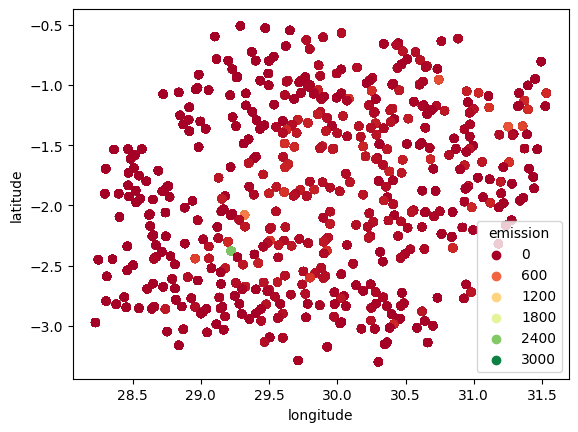

In [14]:
sns.scatterplot(x='longitude', y='latitude', hue = 'emission', edgecolor = None, alpha = 0.2, palette = "RdYlGn", data=train, )

Through this graph, some of the critical spots where higher emission levels are recorded can be easily traced. Let's see whether month or year has any correlation with the emission.

<Axes: xlabel='year', ylabel='emission'>

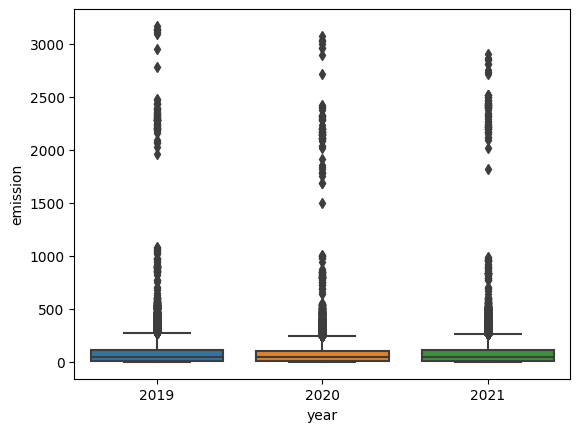

In [15]:
sns.boxplot(x = 'year', y = 'emission', data = train)

<Axes: xlabel='week_no'>

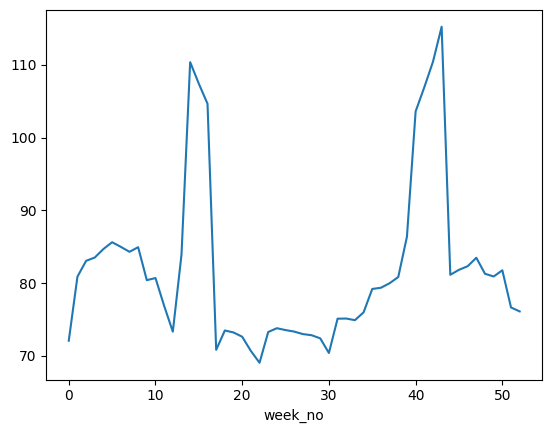

In [14]:
train.groupby('week_no').mean()['emission'].plot()

Well, there maybe some features in our data that maybe closely correlated, if we remove those features, then the results maybe more accurate.

In [16]:
# First creating a correlation matrix and then choosing the upper portion of the correlation matrix
corr_matrix = train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# Dropping the features that are closely related
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
print(train.shape)

['SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_SO2_column_number_density_15km', 'UvAerosolIndex_solar_azimuth_angle', 'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle', 'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_pressure', 'Cloud_cloud_top_height', 'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height', 'Cloud_solar_azimuth_angle', 'Cloud_solar_zenith_angle']
(79023, 62)


# 2. Training and making predictions

First we will set our target and then reshape the training and testing set so that the values can be obtained as we want them after the predictions for submission set.

In [17]:
target = train.pop('emission')

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in train:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
    test[col] = scaler.transform(test[col].values.reshape(-1,1))

train

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,...,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle
0,1.988534,-0.728253,-1.224745,-1.699673,-0.636087,-1.385127,1.509398e+00,-1.562718e+00,1.049491,-1.343476,...,1.018211e-14,-2.954149e-15,4.525175e-15,-1.258305e-14,-0.010185,0.051191,-0.264391,0.016880,-0.060901,-0.749722
1,1.988534,-0.728253,-1.224745,-1.634301,-0.111382,-0.637117,-4.257198e-01,4.225951e-01,0.133150,-1.658103,...,1.018211e-14,-2.954149e-15,4.525175e-15,-1.258305e-14,-1.959475,1.223309,-0.773663,-0.296853,1.358742,-0.137216
2,1.988534,-0.728253,-1.224745,-1.568929,1.898465,-0.517711,-7.511914e-01,1.391287e+00,1.208022,-1.928944,...,1.018211e-14,-2.954149e-15,4.525175e-15,-1.258305e-14,0.541459,0.324238,0.145436,-0.413105,0.863995,-1.565923
3,1.988534,-0.728253,-1.224745,-1.503557,0.000000,0.000000,-4.307859e-16,-3.061658e-17,0.000000,0.000000,...,1.018211e-14,-2.954149e-15,4.525175e-15,-1.258305e-14,0.946088,-0.973497,-0.277840,-0.191088,-0.016795,-2.505535
4,1.988534,-0.728253,-1.224745,-1.438185,-0.515673,-0.947314,-5.781988e-01,2.076397e-01,-0.150339,-1.557373,...,1.018211e-14,-2.954149e-15,4.525175e-15,-1.258305e-14,-2.083377,0.779177,-0.816306,-0.722632,1.628642,-0.474997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-2.027202,0.519324,1.224745,1.438185,0.961301,2.155675,5.105594e-01,1.391713e+00,1.452185,-1.656558,...,1.018211e-14,-2.954149e-15,4.525175e-15,-1.258305e-14,0.861624,0.184771,0.081946,0.676450,-0.804315,-0.050471
79019,-2.027202,0.519324,1.224745,1.503557,0.143476,1.768661,2.918630e-01,-8.498675e-02,-1.409055,-1.374394,...,1.018211e-14,-2.954149e-15,4.525175e-15,-1.258305e-14,-0.599359,0.102480,-0.965141,0.863500,0.510282,1.106578
79020,-2.027202,0.519324,1.224745,1.568929,0.000000,0.000000,-4.307859e-16,-3.061658e-17,0.000000,0.000000,...,1.018211e-14,-2.954149e-15,4.525175e-15,-1.258305e-14,1.354321,-0.363685,-0.319972,0.336807,0.344899,-0.797208
79021,-2.027202,0.519324,1.224745,1.634301,-0.333092,0.266174,4.003061e-01,-1.592897e+00,-0.378611,-1.329599,...,1.018211e-14,-2.954149e-15,4.525175e-15,-1.258305e-14,0.994319,-1.336236,0.996306,0.052506,0.634473,1.226297


In [19]:
print(train.shape)

(79023, 61)


Setting the inputs for training and a target

In [20]:
X=train[['latitude','longitude','year', 'week_no']]
y=target

## Random Forest Regression

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
RFR=RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=42, verbose = 1, n_jobs = -1) # Random Forest Regression
RFR.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   35.8s finished


RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42, verbose=1)

# MSE for Random Forest Regression

In [52]:
from sklearn.metrics import mean_absolute_error
from math import sqrt
pred_RFR=RFR.predict(X_val)
print("MSE RFR =",sqrt(mean_absolute_error(y_val,pred_RFR)))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.8s finished


MSE RFR = 1.9018590412821548


# Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor(n_estimators=2000, random_state=42, verbose = 1)
GBR.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1       18459.8440            1.12m
         2       16866.4159           53.00s
         3       15569.7218            1.04m
         4       14516.3866           59.10s
         5       13634.9415           56.48s
         6       12919.1788           53.83s
         7       12348.3338           54.58s
         8       12180.1618           53.02s
         9       11727.0094           54.29s
        10       11355.9097           55.21s
        20       10052.0766           52.92s
        30        8392.3790           50.99s
        40        6844.0666           50.77s
        50        6009.8198           50.28s
        60        5210.5938           51.82s
        70        4568.1634           51.30s
        80        4199.7953           50.44s
        90        3915.0628           49.88s
       100        3750.7918           49.25s
       200        2270.9072           45.33s
       300        1648.0066           42.33s
       40

GradientBoostingRegressor(n_estimators=2000, random_state=42, verbose=1)

In [25]:
pred_GBR=GBR.predict(X_val)
print("MSE GBR =",sqrt(mean_absolute_error(y_val,pred_GBR)))

MSE GBR = 3.25972729890842


# Bagging Regressor

In [26]:
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor(n_estimators=100, random_state=4, verbose = 1, n_jobs = -1)
BR.fit(X_train,y_train)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    6.0s remaining:   42.7s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    7.0s finished


BaggingRegressor(n_estimators=100, n_jobs=-1, random_state=4, verbose=1)

In [27]:
pred_BR=BR.predict(X_val)
print("MSE BR =",sqrt(mean_absolute_error(y_val,pred_BR)))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.1s remaining:    1.4s


MSE BR = 1.9153744190979851


[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.7s finished


# AdaBoostRegressor combined with DecisionTreeRegressor (Best model)

In [93]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
RFR1 = DecisionTreeRegressor(random_state = 42)
ABR=AdaBoostRegressor(estimator = RFR1, n_estimators=50, random_state=42)
RFR1.fit(X_train,y_train)
ABR.fit(X_train,y_train)
pred_ABR=ABR.predict(X_val)
pred_RFR1=RFR1.predict(X_val)
print("MSE RFR1 =",sqrt(mean_absolute_error(y_val,pred_RFR1)))
print("MSE ABR =",sqrt(mean_absolute_error(y_val,pred_ABR)))

MSE RFR1 = 1.9592752922308614
MSE ABR = 1.8692005997253216


# HistGradientBoostingRegressor

In [76]:
from sklearn.ensemble import HistGradientBoostingRegressor
HGBR=HistGradientBoostingRegressor(max_iter=1000, random_state=42)
HGBR.fit(X_train,y_train)
pred_HGBR=HGBR.predict(X_val)
print("MSE HGBR =",sqrt(mean_absolute_error(y_val,pred_HGBR)))

MSE HGBR = 2.357331352940122


# Catboost Regressor

In [64]:
from catboost import CatBoostRegressor
CBR=CatBoostRegressor(num_boost_round = 30000, learning_rate=1, verbose = 1, loss_function='RMSE', )
CBR.fit(X_train,y_train)

0:	learn: 103.2664581	total: 5.14ms	remaining: 2m 34s
1:	learn: 95.5955806	total: 10.1ms	remaining: 2m 31s
2:	learn: 70.9413153	total: 15.8ms	remaining: 2m 37s
3:	learn: 66.2601103	total: 21.1ms	remaining: 2m 38s
4:	learn: 64.5753339	total: 26.5ms	remaining: 2m 39s
5:	learn: 63.5820612	total: 31.6ms	remaining: 2m 38s
6:	learn: 60.4697998	total: 36.1ms	remaining: 2m 34s
7:	learn: 58.0016048	total: 40.3ms	remaining: 2m 31s
8:	learn: 55.5966274	total: 44.3ms	remaining: 2m 27s
9:	learn: 54.0038846	total: 50ms	remaining: 2m 30s
10:	learn: 53.1357891	total: 55.8ms	remaining: 2m 32s
11:	learn: 51.7998045	total: 61.4ms	remaining: 2m 33s
12:	learn: 51.4265585	total: 66.4ms	remaining: 2m 33s
13:	learn: 49.5105796	total: 71.2ms	remaining: 2m 32s
14:	learn: 47.5198414	total: 76.6ms	remaining: 2m 33s
15:	learn: 45.4250267	total: 80.6ms	remaining: 2m 31s
16:	learn: 44.1281333	total: 84.2ms	remaining: 2m 28s
17:	learn: 43.0248336	total: 88.3ms	remaining: 2m 27s
18:	learn: 42.4337370	total: 92.5ms	rem

In [99]:
from sklearn.metrics import mean_absolute_error
from math import sqrt
pred_CBR=CBR.predict(X_val)
print("MSE CBR =",sqrt(mean_absolute_error(y_val,pred_CBR)))

MSE CBR = 2.0552720205511728


# Setting up the predictions as required in the competition and making submission

In [100]:
id=test['ID_LAT_LON_YEAR_WEEK']

In [101]:
pred=CBR.predict(test[['latitude','longitude','year','week_no']])
final_dic={'ID_LAT_LON_YEAR_WEEK':id,'emission':pred}

In [102]:
final_df=pd.DataFrame(final_dic)

In [103]:
final_df

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,-19.920037
1,ID_-0.510_29.290_2022_01,4.005166
2,ID_-0.510_29.290_2022_02,4.091095
3,ID_-0.510_29.290_2022_03,3.100793
4,ID_-0.510_29.290_2022_04,0.764425
...,...,...
24348,ID_-3.299_30.301_2022_44,29.678323
24349,ID_-3.299_30.301_2022_45,29.458083
24350,ID_-3.299_30.301_2022_46,29.599325
24351,ID_-3.299_30.301_2022_47,30.365736


In [104]:
final_df.to_csv('submission.csv',index=False)

# Some of the references that are utilized here and are helpful for regression problems in Keras
https://www.kaggle.com/code/kamrantanwari/basic-feature-engineering-and-tf-baseline
https://catboost.ai/en/docs/concepts/python-reference_catboostregressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor
https://www.kaggle.com/code/cybersimar08/co2-emission-eda-random-forest